In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Fetch all files from directory and merge into a Single df

In [2]:
fileNames=[file for file in os.listdir(r"C:\Users\Aman\Downloads\pandas\pandas1\SalesAnalysis\Sales_Data")]
final_df=pd.DataFrame()
for file in fileNames:
    df=pd.read_csv(r"C:\Users\Aman\Downloads\pandas\pandas1\SalesAnalysis\Sales_Data\{}".format(file))
    final_df=pd.concat([df,final_df])
final_df.to_csv('Final_data.csv',index=False)

# File read

In [3]:
df=pd.read_csv(r"C:\Users\Aman\Onedrive\desktop\Final_data.csv")
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"


# Find Null values

In [4]:
new_df=df[df.isna().any(axis=1)]
df=df.dropna(how='all')
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"


# Select df where data is not equal to 'Or'

In [5]:
df=df[df['Order Date'].str[:2]!='Or']
df['Month']=df['Order Date'].str[:2].astype('int32')
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9


# convert qty ordered, price into int,fload and find Total Sale

In [6]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')
df['Price Each']=df['Price Each'].astype('float32')
df['Total Sale']=df['Quantity Ordered']*df['Price Each']
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90


In [7]:
df1=df.groupby('Month')
dff=df1['Quantity Ordered','Product','Price Each','Total Sale'].sum()

C:\Users\Aman\AppData\Local\Temp\ipykernel_32616\1999753545.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dff=df1['Quantity Ordered','Product','Price Each','Total Sale'].sum()


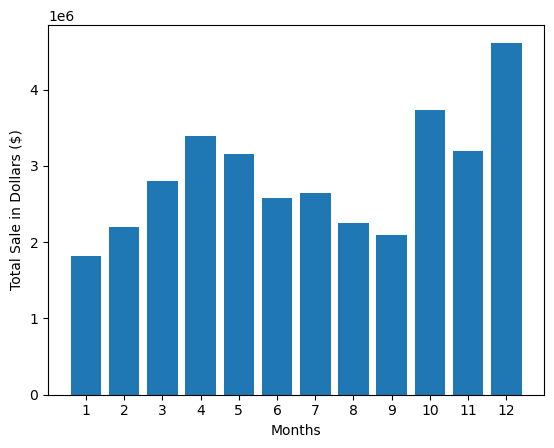

In [8]:
import matplotlib.pyplot as plt
val=range(1,13)
plt.bar(val,dff['Total Sale'])
plt.xticks(val)
plt.xlabel('Months')
plt.ylabel('Total Sale in Dollars ($)')
plt.show()

# Which city sold the most product ?

In [9]:
def splitByCityName(address):
    return address.split(',')[1]

def splitWithState(address):
    return address.split(',')[2].split(' ')[1]
df['City']=df['Purchase Address'].apply(lambda x :splitByCityName(x)+', '+splitWithState(x))
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,"Los Angeles, CA"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,"Austin, TX"


In [10]:
dff=df.groupby('City').sum()
dff

,Quantity Ordered,Price Each,Month,Total Sale
City,,,,
"Atlanta, GA",16602,2779908.250,104794,2.795499e+06
"Austin, TX",11153,1809873.625,69829,1.819582e+06
"Boston, MA",22528,3637409.750,141112,3.661642e+06
"Dallas, TX",16730,2752627.750,104620,2.767975e+06
"Los Angeles, CA",33289,5421435.000,208325,5.452571e+06
"New York City, NY",27932,4635371.000,175741,4.664317e+06
"Portland, ME",2750,447189.250,17144,4.497583e+05
"Portland, OR",11303,1860558.250,70621,1.870732e+06
"San Francisco, CA",50239,8211461.500,315520,8.262204e+06


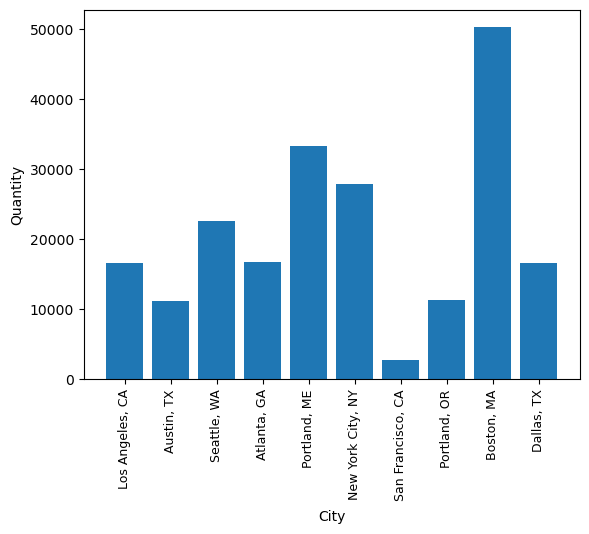

In [11]:

cities=df['City'].unique()
plt.bar(cities,dff['Quantity Ordered'])
plt.xticks(cities,rotation='vertical',size=9)
plt.xlabel('City')
plt.ylabel('Quantity')
plt.show()

# which is the Best Time for advertise the product for customer's buying?

In [12]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Hour']=df['Order Date'].dt.hour
df['Minutes']=df['Order Date'].dt.minute
df['Count']=1

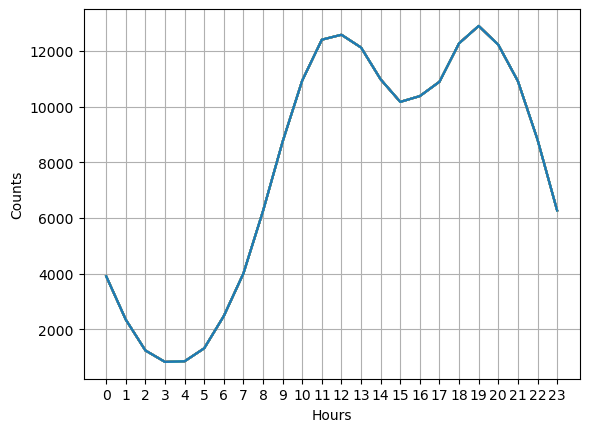

In [13]:
hours=[hour for hour,df in df.groupby('Hour')]
plt.plot(hours,df.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.show()

# what product more often sold Together?

In [14]:
df.count(0)

Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
Month               185950
Total Sale          185950
City                185950
Hour                185950
Minutes             185950
Count               185950
dtype: int64

In [15]:
new_df = df[df['Order ID'].duplicated(keep=False)]
new_df['PRODUCTS'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
new_df=new_df[['Order ID','PRODUCTS']].drop_duplicates()
new_df

C:\Users\Aman\AppData\Local\Temp\ipykernel_32616\3295881367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PRODUCTS'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,PRODUCTS
20,248171,"USB-C Charging Cable, USB-C Charging Cable"
60,248210,"iPhone, Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones, Google Phone"
117,248265,"Vareebadd Phone, Bose SoundSport Headphones"
176,248323,"Google Phone, Bose SoundSport Headphones"
...,...,...
186758,194008,"AA Batteries (4-pack), Wired Headphones"
186772,194021,"Google Phone, Wired Headphones"
186802,194050,"AA Batteries (4-pack), USB-C Charging Cable"
186809,194056,"iPhone, Lightning Charging Cable"


In [16]:
count=Counter()
for i in new_df['PRODUCTS']:
    row=i.split(',')
    count.update(Counter(combinations(row,2)))
    
for key, value in count.most_common():
    print(key,value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80
(' Lightning Charging Cable', ' Wired Headphones') 62
('Lightning Charging Cable', ' USB-C Charging Cable') 55
('Lightning Charging Cable', ' AA Batteries (4-pack)') 52
('AA Batteries (4-pack)', ' Lightning Charging Cable') 51
('Lightning Charging Cable', ' Lightning Charging Cable') 51
(' USB-C Charging Cable', ' Bose SoundSport Headphones') 51
('AAA Batteries (4-pack)', ' USB-C Charging Cable') 50
('AAA Batteries (4-pack)', ' AAA Batteries (4-pack)') 48
('AA Batteries (4-pack)', ' AAA Batteries (4-pack)') 48
(' Lightning Chargin

# Which product sold the most?

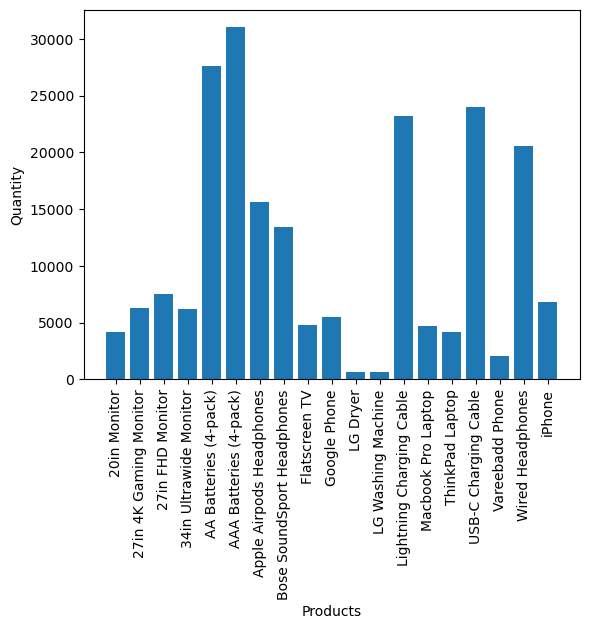

In [31]:
df1=df.groupby('Product')
quantity_ordered=df1.sum()['Quantity Ordered']
products=[product for product,df in df1]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=10)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()